# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
# shape of dataframe
df_data.shape

(4324, 9)

In [7]:
# How many rows and columns does it have
print(f"Number of rows are: {df_data.shape[0]} \nNumber of columns are: {df_data.shape[1]}")

Number of rows are: 4324 
Number of columns are: 9


In [8]:
# What are the column names?
print("Column names are: ")
for _ in df_data.columns:
  print(_)

Column names are: 
Unnamed: 0.1
Unnamed: 0
Organisation
Location
Date
Detail
Rocket_Status
Price
Mission_Status


In [9]:
# Are there any NaN values or duplicates
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [10]:
# Are there any NaN values or duplicates
df_data.isnull().values.any()

True

In [11]:
# Are there any NaN values or duplicates
df_data.duplicated().any()

False

In [12]:
df_data[df_data.duplicated()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


In [13]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [14]:
# Dropping first two columns
df_clean = df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [15]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [16]:
# Duplicates
has_duplicate = df_clean.duplicated().any()
print(has_duplicate)

True


In [17]:
df_clean[df_clean.duplicated(keep=False)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [18]:
# Checking rows with missing values
df_clean.isnull().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [19]:
# Fill missing values
df_clean = df_clean.fillna(0)

In [20]:
# Checking each column info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           4324 non-null   object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [21]:
# Changing price column to integer
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce') # ensuring all values are numeric before converting
df_clean['Price'] = df_clean['Price'].fillna(0) # Handle NaN values by filling
df_clean['Price'] = df_clean['Price'].astype(int) # convert to int type

In [22]:
# Working on the date
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='mixed', utc=True)


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           4324 non-null   int64              
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 236.6+ KB


In [24]:
df_clean.sample(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3032,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1974-06-06 06:20:00+00:00,Voskhod | Cosmos 658,StatusRetired,0,Success
2188,MHI,"LA-Y1, Tanegashima Space Center, Japan",1984-08-02 20:30:00+00:00,N-II Star-37E | Himawari 3,StatusRetired,0,Success
826,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2008-04-14 20:12:00+00:00,Atlas V 421 | ICO G1,StatusActive,123,Success
2180,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1984-08-30 12:41:00+00:00,Space Shuttle Discovery | STS-41-D,StatusRetired,450,Success
3968,NASA,"SLC-37B, Cape Canaveral AFS, Florida, USA",1965-05-25 07:35:00+00:00,Saturn I | A-104,StatusRetired,0,Success
2599,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1978-04-20 15:30:00+00:00,Soyuz U | Cosmos 1003,StatusRetired,0,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,0,Success
1518,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1995-03-24 14:05:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-13,StatusRetired,0,Success
2230,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1983-12-21 06:07:00+00:00,Molniya-M /Block ML | Molniya-3 n†­109,StatusRetired,0,Success
2204,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1984-05-17 14:43:00+00:00,Cosmos-3M (11K65M) | Cosmos 1553,StatusRetired,0,Success


## Descriptive Statistics

In [25]:
# Summary statistics
df_clean.describe()

,Price
count,"4,324.00"
mean,28.45
std,85.93
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,450.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [26]:
# Group by organization, finding total num. of launches
launch_counts = df_clean.groupby("Organisation")['Mission_Status'].count()

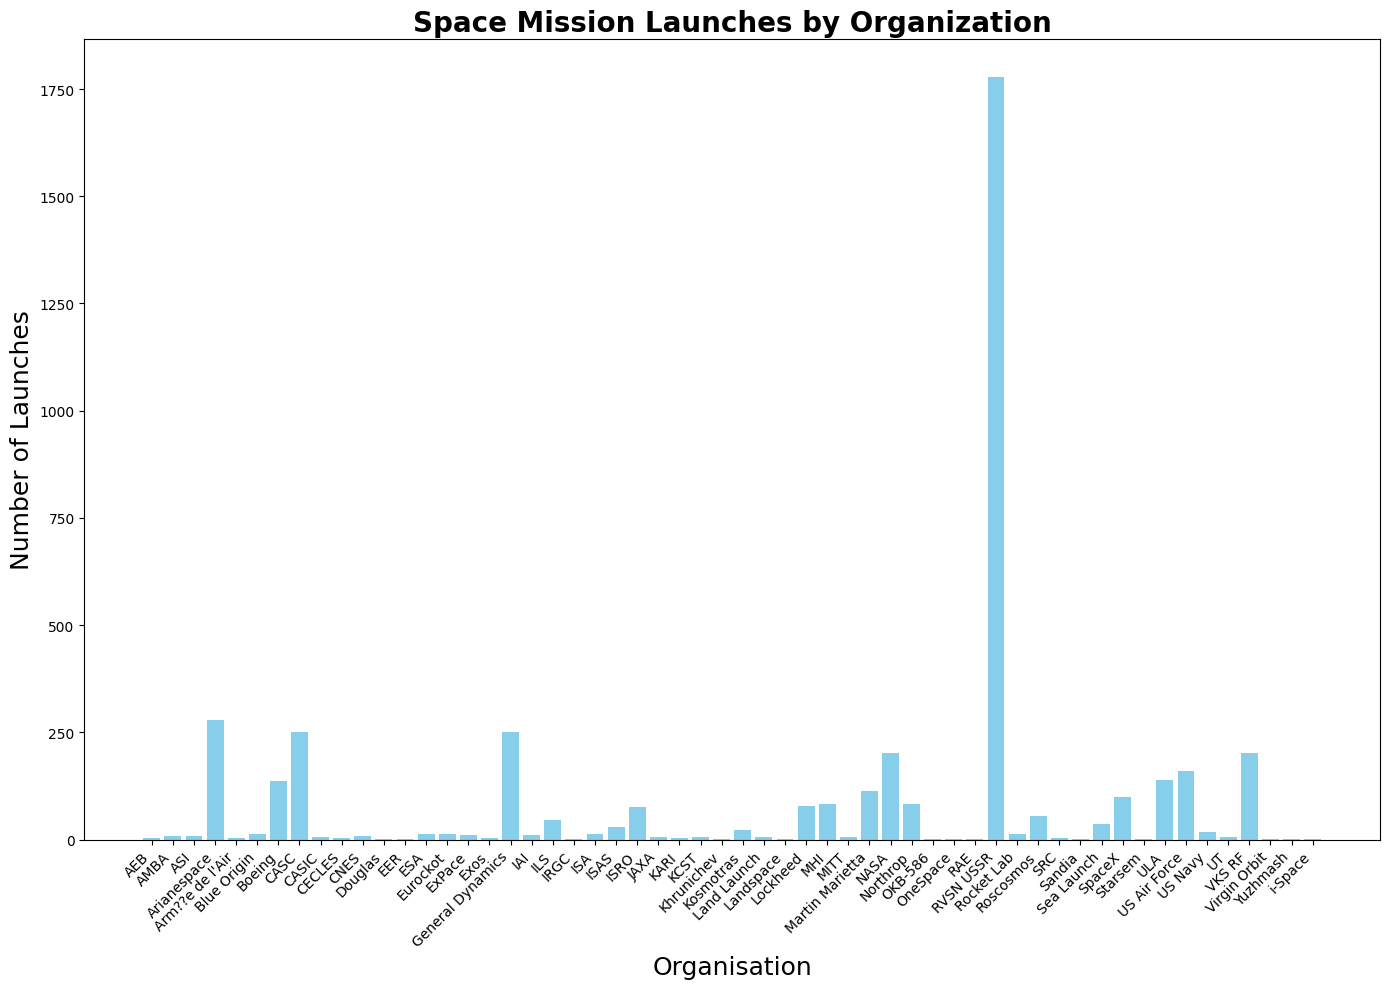

In [27]:
plt.figure(figsize=(14, 10))
plt.bar(launch_counts.index, launch_counts.values, color='skyblue')
plt.xlabel("Organisation", fontdict={'size':18})
plt.ylabel("Number of Launches", fontdict={'size':18})
plt.title("Space Mission Launches by Organization", fontdict={'size': 20, 'weight':'bold'})
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [28]:
# Filtering rockets by status
active_rockets = df_clean[df_clean['Rocket_Status'] == "StatusActive"]
decommissioned_rockets = df_clean[df_clean["Rocket_Status"] != "StatusActive"]

# Count of number of active and decommissioned rockets
num_active = len(active_rockets)
num_decommissioned = len(decommissioned_rockets)

In [29]:
print(f"Number of active rockets: {num_active}")
print(f"Number of decommissioned rockets: {num_decommissioned}")

Number of active rockets: 790
Number of decommissioned rockets: 3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [30]:
# Filtering successful and failed missions
successful_missions = df_clean[df_clean["Mission_Status"] == "Success"]
failed_missions = df_clean[df_clean["Mission_Status"] != "Success"]

# Count of number of successful and failed missions
num_successful = len(successful_missions)
num_failed = len(failed_missions)

In [31]:
print(f"Number of successful missions: {num_successful}")
print(f"Number of failed missions: {num_failed}")

Number of successful missions: 3879
Number of failed missions: 445


In [32]:
# Mission status and corresponding counts
mission_status = ["Successful", "Failed"]
mission_counts = [len(successful_missions), len(failed_missions)]

# Create bar plot
fig = px.bar(
    x=mission_status,
    y=mission_counts,
    color=mission_status,
    color_discrete_map={"Successful": "green", "Failed": "red"},
    labels={"x": "Mission Status", "y": "Number of Missions"},
    title="Space Mission vs. Failure"
)

# Show plot
fig.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

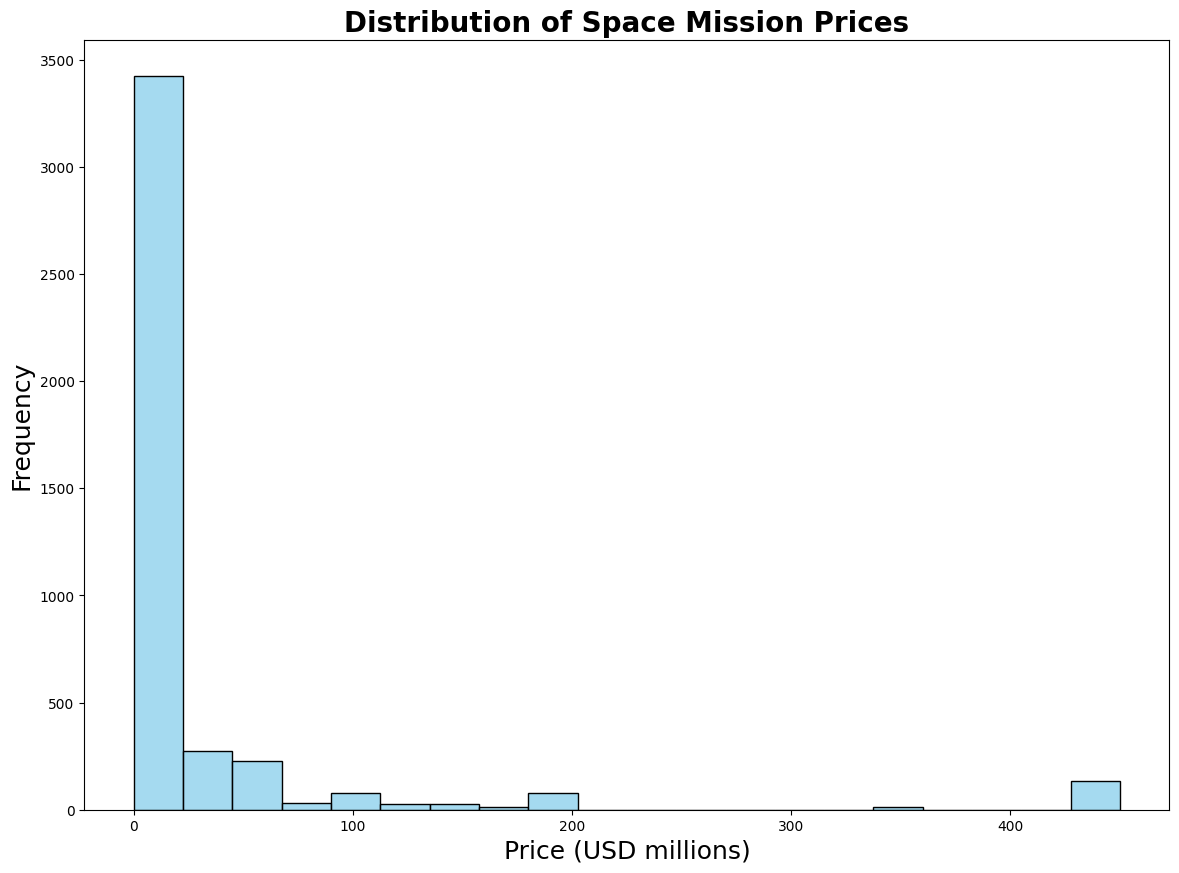

In [33]:
# Create the chart
plt.figure(figsize=(14, 10))
sns.histplot(df_clean["Price"], bins=20, color='skyblue', kde=False)

# Set plot title and labels
plt.xlabel('Price (USD millions)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Distribution of Space Mission Prices', fontsize=20, weight='bold')

# Show plot
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [34]:
# Getting the country names from the 'Location' column
df_clean['Country'] = df_clean['Location'].apply(lambda x: x.split(',')[-1].strip())

# Standardize country names
country_replacements = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

df_clean['Country'] = df_clean['Country'].replace(country_replacements)

# Change country names to ISO 3166-1 Alpha-3 codes
def get_alpha3(country_name):
    try:
        return iso3166.countries.get(country_name).alpha3
    except KeyError:
        return None

df_clean['CountryCode'] = df_clean['Country'].apply(get_alpha3)

# Count of number of launches by country
launch_counts = df_clean['CountryCode'].value_counts().reset_index()
launch_counts.columns = ['CountryCode', 'Launches']

# The choropleth map
fig = px.choropleth(
    launch_counts,
    locations="CountryCode",
    color="Launches",
    hover_name="CountryCode",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Number of Launches by Country"
)

fig.show()


# Use a Choropleth Map to Show the Number of Failures by Country


In [35]:
# Failed missions
df_failures = df_clean[df_clean['Mission_Status'] == 'Failure']

df_failures.loc[:, 'CountryCode'] = df_failures['Country'].apply(get_alpha3)

# Number of failures by country
failure_counts = df_failures['CountryCode'].value_counts().reset_index()
failure_counts.columns = ['CountryCode', 'Failures']

# Choropleth map
fig = px.choropleth(
    failure_counts,
    locations="CountryCode",
    color="Failures",
    hover_name="CountryCode",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Number of Failures by Country"
)

fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [36]:
df_clean['Country'] = df_clean['Country'].replace(country_replacements)

# Create the Sunburst chart
fig = px.sunburst(
    df_clean,
    path=['Country', 'Organisation', 'Mission_Status'],
    values='Price',
    title="Sunburst Chart of Countries, Organisations, and Mission Statuses",
    color='Mission_Status'
)

fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [37]:
# Groupby 'Organisation' and sum the 'Price' values
organisation_spending = df_clean.groupby('Organisation')['Price'].sum().reset_index()

In [38]:
# Sort by total spending
organisation_spending = organisation_spending.sort_values(by='Price', ascending=False)

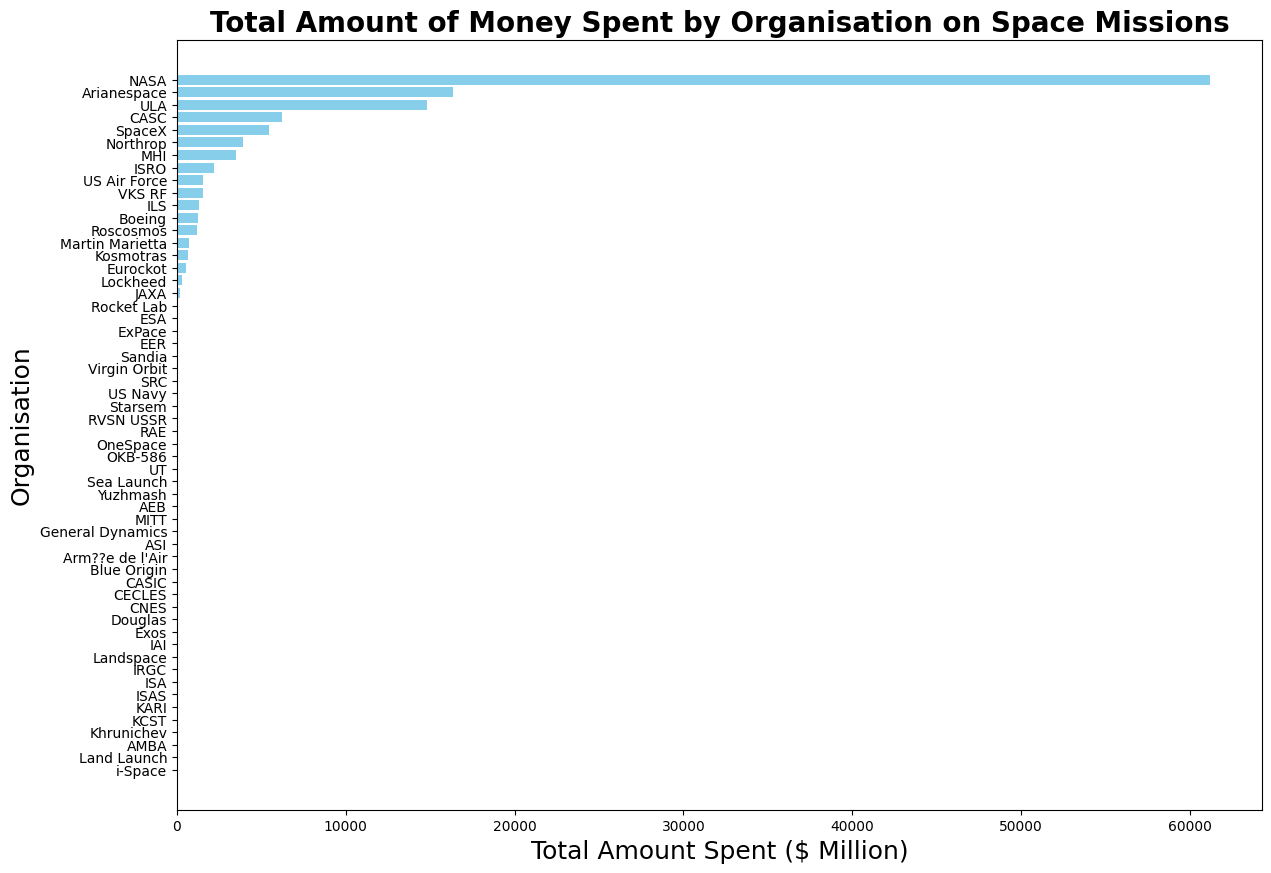

In [39]:
# Bar chart
plt.figure(figsize=(14, 10))
plt.barh(organisation_spending['Organisation'], organisation_spending['Price'], color='skyblue')
plt.xlabel('Total Amount Spent ($ Million)', fontdict={'size':18})
plt.ylabel('Organisation', fontdict={'size':18})
plt.title('Total Amount of Money Spent by Organisation on Space Missions', fontdict={'weight':'bold', 'size':20})
plt.gca().invert_yaxis()  # Invert y-axis to have the highest spender on top
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [40]:
# Number of launches per organisation
launch_counts = df_clean['Organisation'].value_counts().reset_index()
launch_counts.columns = ['Organisation', 'Launch_Count']

# Total amount spent by each organisation
total_spent = df_clean.groupby('Organisation')['Price'].sum().reset_index()

In [41]:
# Merger of the two dataframes on 'Organisation'
organisation_spending = pd.merge(total_spent, launch_counts, on='Organisation')

# Average amount spent per launch for each organisation
organisation_spending['Avg_Spent_Per_Launch'] = organisation_spending['Price'] / organisation_spending['Launch_Count']

# Average spending per launch
organisation_spending = organisation_spending.sort_values(by='Avg_Spent_Per_Launch', ascending=False)


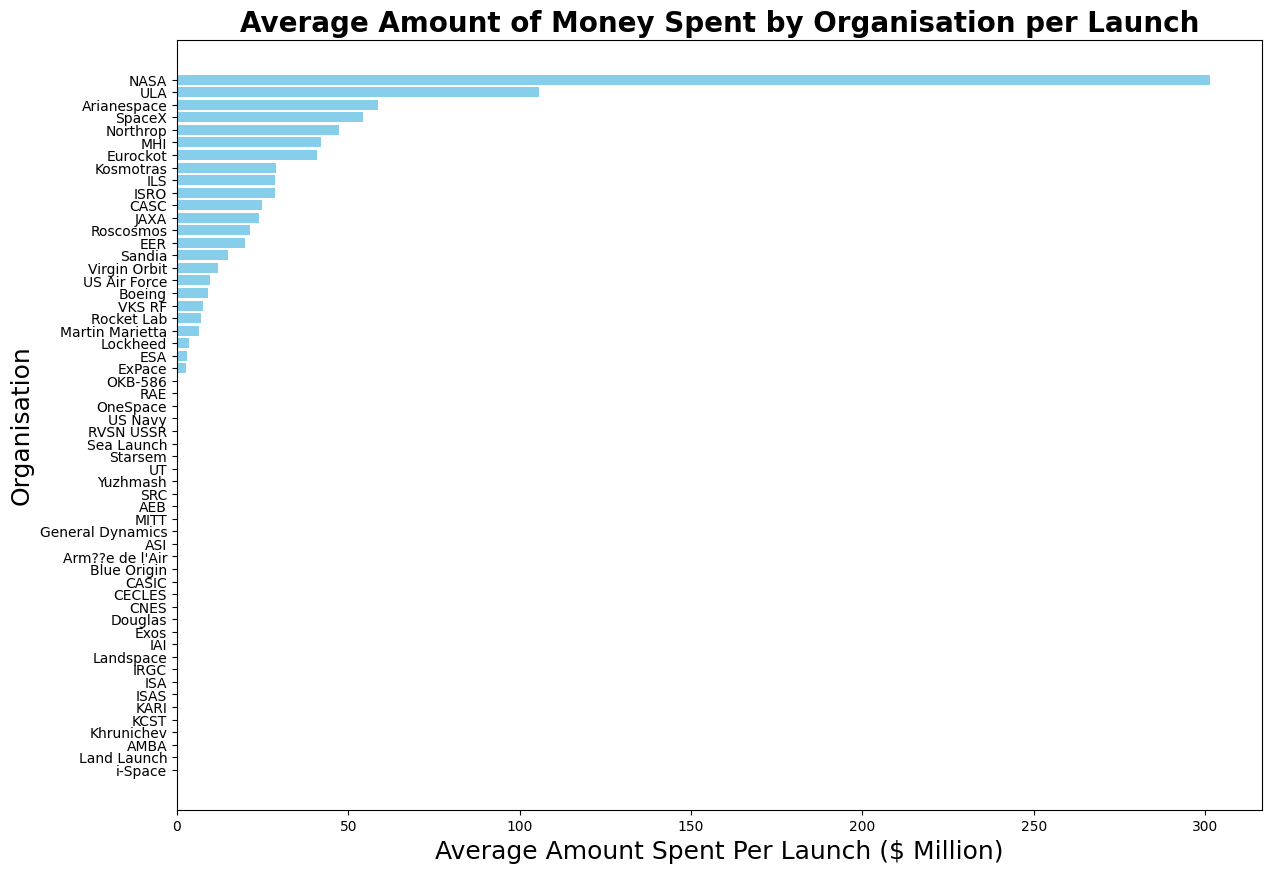

In [42]:
# Plot the results using a bar chart
plt.figure(figsize=(14, 10))
plt.barh(organisation_spending['Organisation'], organisation_spending['Avg_Spent_Per_Launch'], color='skyblue')
plt.xlabel('Average Amount Spent Per Launch ($ Million)', fontdict={'size':18})
plt.ylabel('Organisation', fontdict={'size':18})
plt.title('Average Amount of Money Spent by Organisation per Launch', fontdict={'size':20, 'weight':'bold'})
plt.gca().invert_yaxis()  # Invert y-axis to have the highest spender on top
plt.show()

# Chart the Number of Launches per Year

In [43]:
# Ensure the 'Date' column is in datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

In [44]:
# Get the year from the 'Date' column
df_clean['Year'] = df_clean['Date'].dt.year

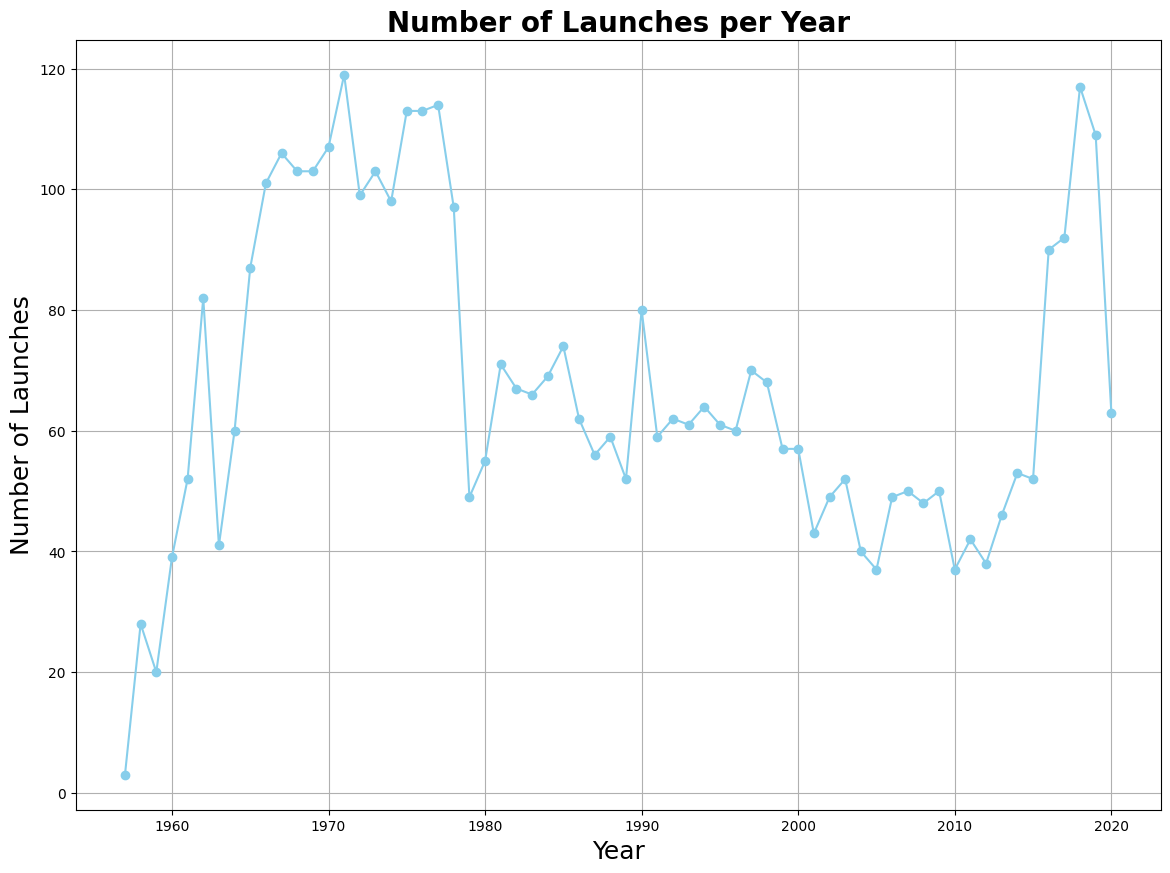

In [45]:
# Number of launches per year
launches_per_year = df_clean['Year'].value_counts().sort_index()

# line chart
plt.figure(figsize=(14, 10))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year', fontdict={'size':18})
plt.ylabel('Number of Launches', fontdict={'size':18})
plt.title('Number of Launches per Year', fontdict={'size': 20, 'weight':'bold'})
plt.grid(True)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [46]:
# Get the month from the 'Date' column
df_clean['YearMonth'] = df_clean['Date'].dt.to_period('M')

# Group by the YearMonth to count the number of launches
launches_per_month = df_clean['YearMonth'].value_counts().sort_index()

# Rolling average
rolling_average = launches_per_month.rolling(window=9).mean()

<ipython-input-46-fd4616a825b6>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



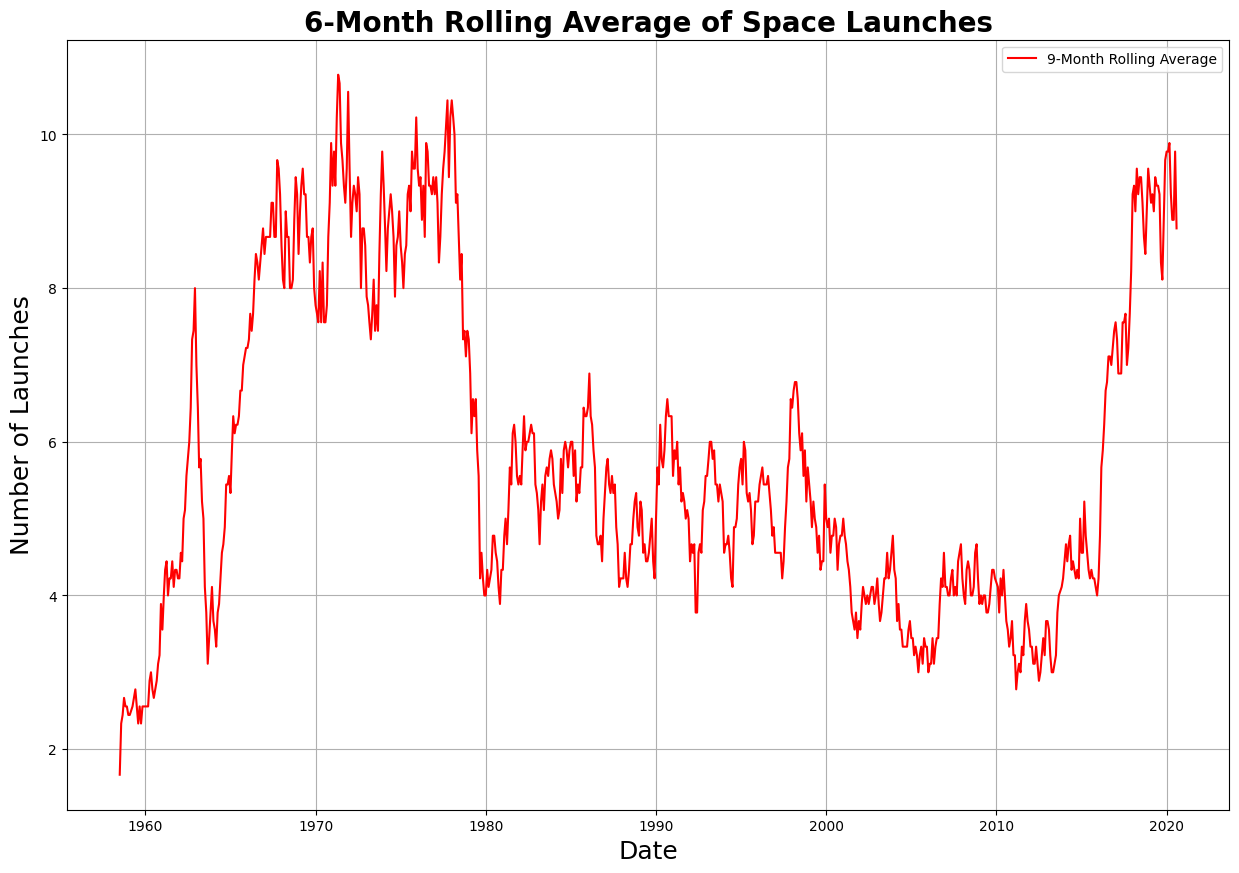

In [47]:
# Chart
plt.figure(figsize=(15, 10))
plt.plot(rolling_average.index.to_timestamp(), rolling_average.values, color='red', linestyle='-', label='9-Month Rolling Average')
plt.xlabel('Date', fontdict={'size':18})
plt.ylabel('Number of Launches', fontdict={'size':18})
plt.title('6-Month Rolling Average of Space Launches', fontdict={'size':20, 'weight':'bold'})
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Month with the highest number of launches
max_launches_month = launches_per_month.idxmax()
print(f"The month with the highest number of launches is: {max_launches_month}")

The month with the highest number of launches is: 1971-12


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [49]:
# Extract the month from the 'Date' column
df_clean['Month'] = df_clean['Date'].dt.month

# Group by the month to count the number of launches
launches_per_month = df_clean['Month'].value_counts().sort_index()

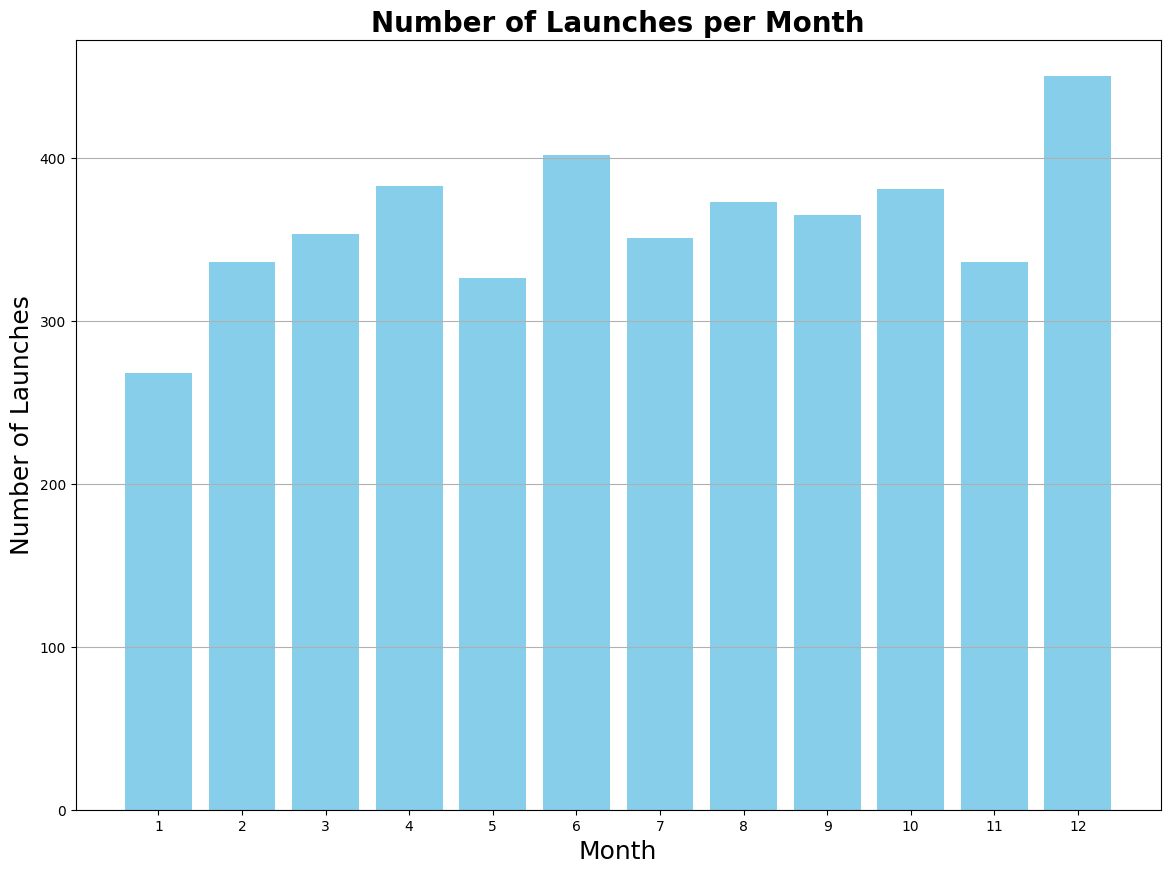

In [50]:
# Plot the results
plt.figure(figsize=(14, 10))
plt.bar(launches_per_month.index, launches_per_month.values, color='skyblue')
plt.xlabel('Month', fontdict={'size':18})
plt.ylabel('Number of Launches', fontdict={'size':18})
plt.title('Number of Launches per Month', fontdict={'size': 20, 'weight':'bold'})
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

In [51]:
# Find the month with the highest and lowest number of launches
max_launches_month = launches_per_month.idxmax()
min_launches_month = launches_per_month.idxmin()
print(f"The month with the highest number of launches is: {max_launches_month}")
print(f"The month with the lowest number of launches is: {min_launches_month}")


The month with the highest number of launches is: 12
The month with the lowest number of launches is: 1


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

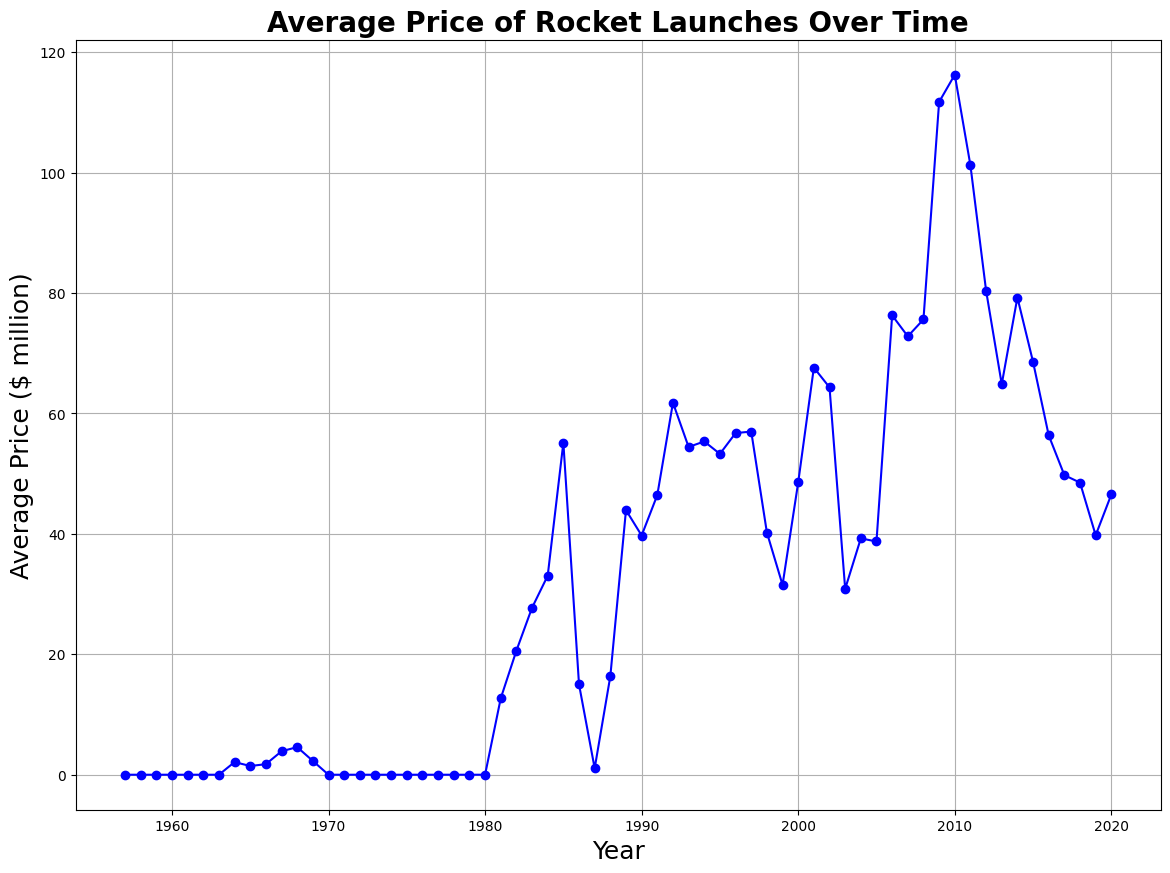

In [52]:
# Extract the year from the date
df_clean['Year'] = df_clean['Date'].dt.year

# Group by year and finding average price
average_price_by_year = df_clean.groupby('Year')['Price'].mean()

# Line chart
plt.figure(figsize=(14, 10))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o', color='b')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Price ($ million)', fontsize=18)
plt.title('Average Price of Rocket Launches Over Time', fontdict={'size':20, 'weight':'bold'})
plt.grid(True)
plt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

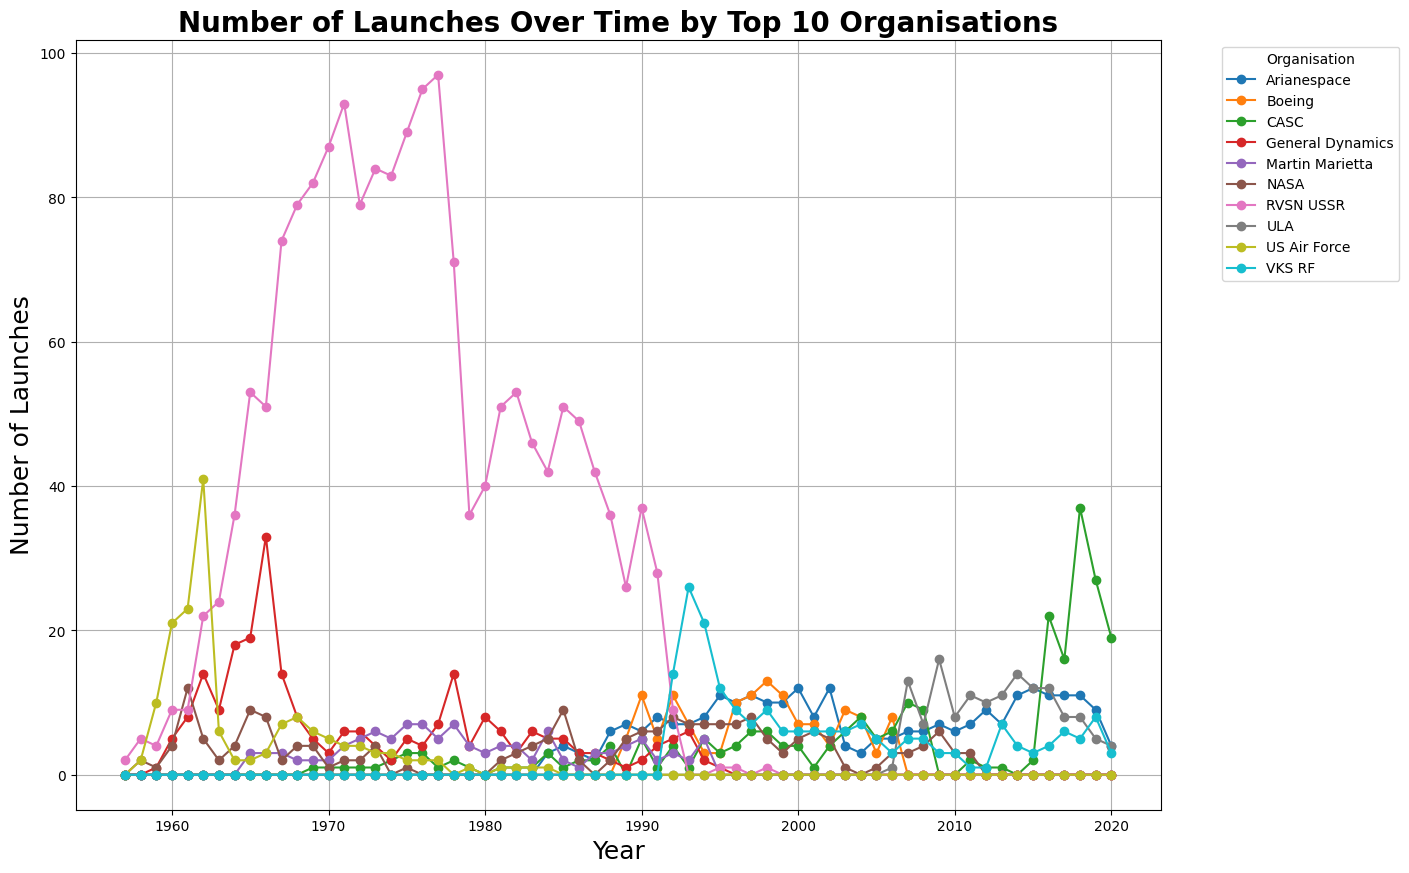

In [53]:
# Top 10 organizations by the number of launches
top_10_organizations = df_clean['Organisation'].value_counts().nlargest(10).index

# Top 10 organizations
df_top_10 = df_clean[df_clean['Organisation'].isin(top_10_organizations)]

# Group by year and organization and count of number of launches
launches_per_year_org = df_top_10.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Line plot
plt.figure(figsize=(14, 10))
launches_per_year_org.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())

plt.xlabel('Year', fontdict={'size':18})
plt.ylabel('Number of Launches', fontdict={'size':18})
plt.title('Number of Launches Over Time by Top 10 Organisations', fontdict={'size':20, 'weight':'bold'})
plt.grid(True)
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [54]:
# Function to classify each launch as either USSR (including former Soviet Republics) or USA
def classify_country(location):
    ussr_countries = ['Kazakhstan', 'Russia', 'Russian Federation']
    usa_locations = ['USA', 'California', 'Texas', 'Florida']

    if any(country in location for country in ussr_countries):
        return 'USSR'
    elif any(loc in location for loc in usa_locations):
        return 'USA'
    else:
        return 'Other'

# New column 'Country'
df_clean['Country'] = df_clean['Location'].apply(classify_country)

# Filter for only USSR and USA
df_filtered = df_clean[df_clean['Country'].isin(['USSR', 'USA'])]

# Count for number of launches for each region
launch_counts = df_filtered['Country'].value_counts()

# Pie Chart
fig = px.pie(values=launch_counts.values, names=launch_counts.index, title='Comparison of Total Number of Launches: USSR vs USA')
fig.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Figure size 1400x1000 with 0 Axes>

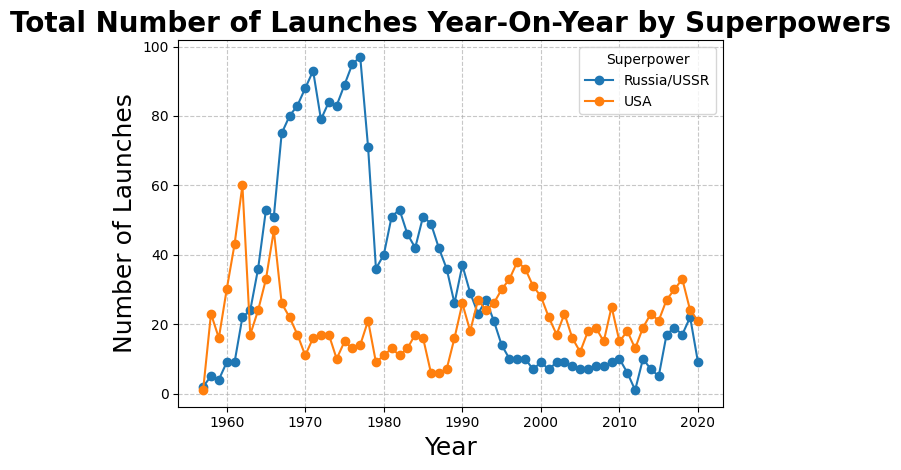

In [59]:
# Year column
df_clean['Year'] = pd.to_datetime(df_clean['Date']).dt.year

# Superpowers and their associated locations
usa_orgs = ['SpaceX', 'ULA', 'Northrop']
russia_orgs = ['Roscosmos']
russia_locations = ['Kazakhstan', 'Russia']

# Function to categorize launches
def categorize_launch(row):
    if row['Organisation'] in usa_orgs or 'USA' in str(row['Location']):
        return 'USA'
    elif (row['Organisation'] in russia_orgs or
          any(loc in str(row['Location']) for loc in russia_locations)):
        return 'Russia/USSR'
    else:
        return 'Other'

# Apply the categorization
df_clean['Superpower'] = df_clean.apply(categorize_launch, axis=1)

# Launches by year and superpower
launches = df_clean[
    df_clean['Superpower'].isin(['USA', 'Russia/USSR'])
    ].groupby(['Year', 'Superpower']).size().unstack(fill_value=0)

# Chart
plt.figure(figsize=(14, 10))
launches.plot(kind='line', marker='o')

plt.title('Total Number of Launches Year-On-Year by Superpowers', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Launches', fontsize=18)
plt.legend(title='Superpower', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show();

## Chart the Total Number of Mission Failures Year on Year.

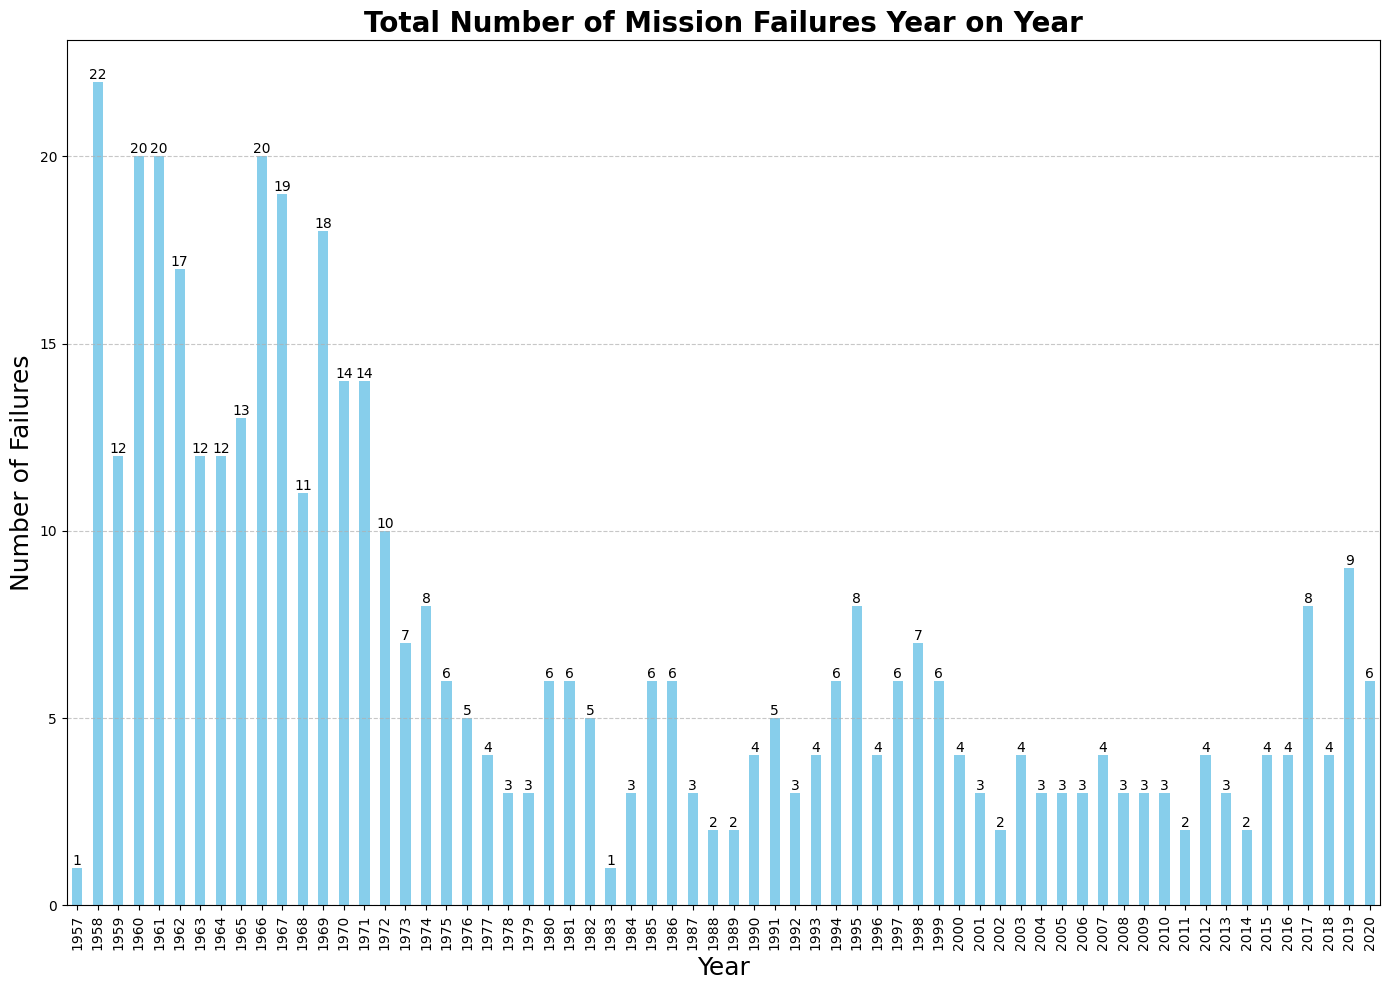

In [56]:
# A binary column for failures
df_clean['Failure'] = (df_clean['Mission_Status'] != 'Success').astype(int)

# Group by Year and sum of failures
failures_by_year = df_clean.groupby('Year')['Failure'].sum()

# Chart
plt.figure(figsize=(14, 10))
failures_by_year.plot(kind='bar', color='skyblue')

plt.title('Total Number of Mission Failures Year on Year', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Failures', fontsize=18)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# x-axis labels rotation for better readability
plt.xticks(rotation=90)

# Value labels on top of each bar
for i, v in enumerate(failures_by_year):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

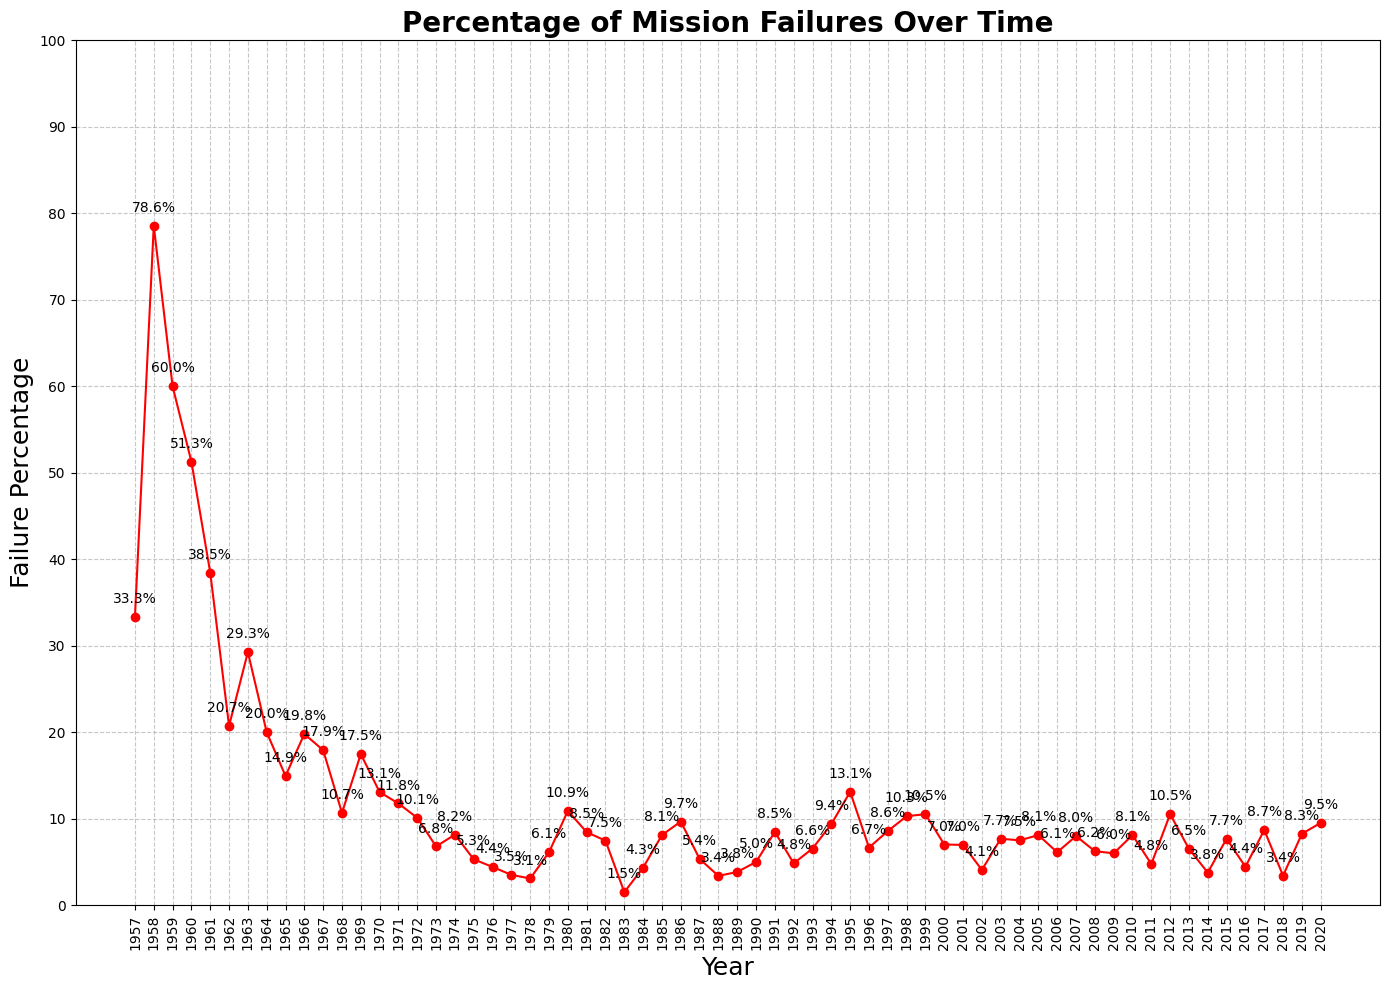

    Year  Failure  Mission_Status  Failure_Percentage
0   1957     0.33               3               33.33
1   1958     0.79              28               78.57
2   1959     0.60              20               60.00
3   1960     0.51              39               51.28
4   1961     0.38              52               38.46
..   ...      ...             ...                 ...
59  2016     0.04              90                4.44
60  2017     0.09              92                8.70
61  2018     0.03             117                3.42
62  2019     0.08             109                8.26
63  2020     0.10              63                9.52

[64 rows x 4 columns]


In [57]:
# A binary column for failures
df_clean['Failure'] = (df_clean['Mission_Status'] != 'Success').astype(int)

# Group by Year and the percentage of failures
failures_percentage = df_clean.groupby('Year').agg({
    'Failure': 'mean',
    'Mission_Status': 'count'
}).reset_index()

failures_percentage['Failure_Percentage'] = failures_percentage['Failure'] * 100

# Chart
plt.figure(figsize=(14, 10))
plt.plot(failures_percentage['Year'], failures_percentage['Failure_Percentage'],
         marker='o', linestyle='-', color='red')

plt.title('Percentage of Mission Failures Over Time', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Year', fontsize=18)
plt.ylabel('Failure Percentage', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)

# x-axis labels rotation for better readability
plt.xticks(failures_percentage['Year'], rotation=90)

# Value labels on each point
for x, y in zip(failures_percentage['Year'], failures_percentage['Failure_Percentage']):
    plt.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# y-axis to percentage scale
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

plt.tight_layout()
plt.show()

# summary statistics
print(failures_percentage)

From the chart, it shows failures went down over the years and countries got better at minimising risk and improving their chances of success over time

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [58]:
# Function to classify countries (as previously defined)
def classify_country(location):
    ussr_countries = ['Kazakhstan', 'Russia', 'Russian Federation']
    usa_locations = ['USA', 'California', 'Texas', 'Florida']

    if any(country in location for country in ussr_countries):
        return 'USSR/Russia'
    elif any(loc in location for loc in usa_locations):
        return 'USA'
    else:
        return 'Other'

# Apply the classification function
df_clean['Country'] = df_clean['Location'].apply(classify_country)

# Count launches by year and country
launches_by_year_country = df_clean.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Cumulative launches
cumulative_launches = launches_by_year_country.cumsum()

# The leading country for each year
leading_country = pd.DataFrame({
    'Leading_Country': cumulative_launches.idxmax(axis=1),
    'Total_Launches': cumulative_launches.max(axis=1)
})

print(leading_country)

     Leading_Country  Total_Launches
Year                                
1957     USSR/Russia               2
1958             USA              24
1959             USA              40
1960             USA              70
1961             USA             113
...              ...             ...
2016     USSR/Russia            2029
2017     USSR/Russia            2048
2018     USSR/Russia            2065
2019     USSR/Russia            2087
2020     USSR/Russia            2096

[64 rows x 2 columns]


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

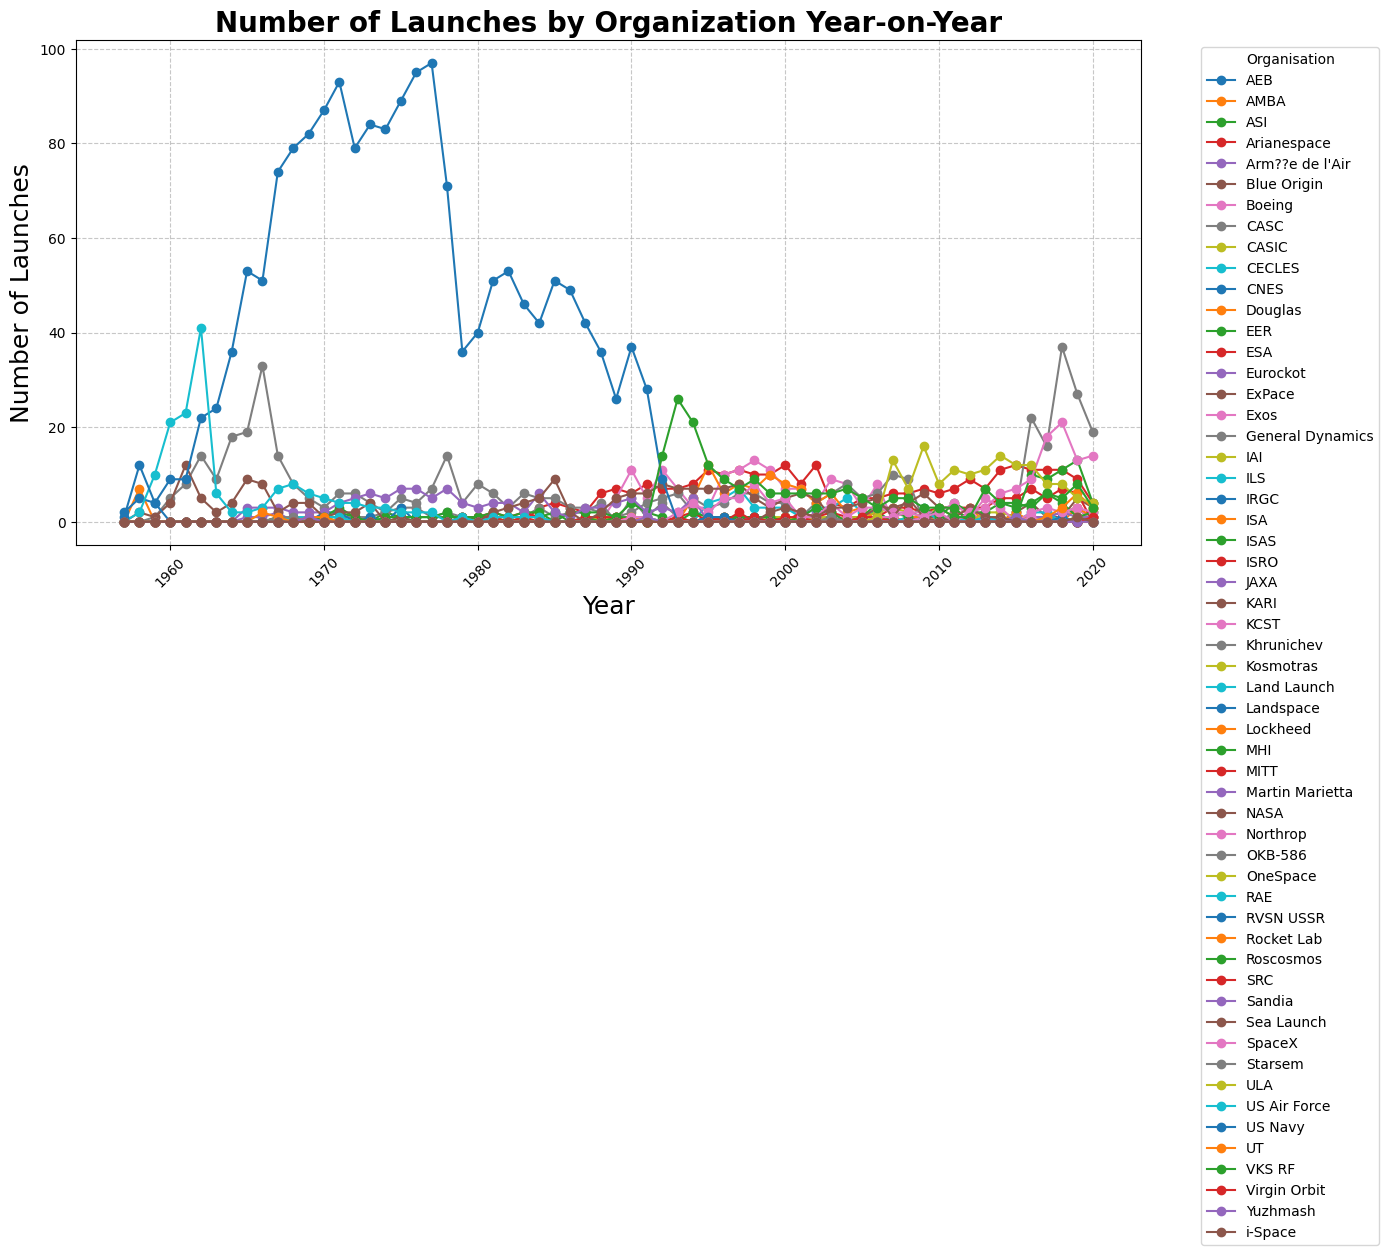

In [63]:
# Year from the Date column
df_clean['Year'] = df_clean['Date'].dt.year

# Group by Year and Organisation, count of launches
launches_by_year_org = df_clean.groupby(
    ['Year', 'Organisation']
    ).size().unstack(fill_value=0)

# Organization with the most launches for each year
dominant_org = launches_by_year_org.idxmax(axis=1)

# Chart
plt.figure(figsize=(14, 10))

# Line plot for each organization
for org in launches_by_year_org.columns:
    plt.plot(launches_by_year_org.index, launches_by_year_org[org], label=org, marker='o')

plt.title('Number of Launches by Organization Year-on-Year', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Launches', fontsize=18)
plt.legend(title='Organisation', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# x-axis labels rotation for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [64]:
# Print the dominant organization for each year
print(dominant_org)



Year
1957       RVSN USSR
1958         US Navy
1959    US Air Force
1960    US Air Force
1961    US Air Force
            ...     
2016            CASC
2017          SpaceX
2018            CASC
2019            CASC
2020            CASC
Length: 64, dtype: object


In [65]:
# Analyze dominance in specific periods
print("\nDominant organization in the 1970s and 1980s:")
print(dominant_org[(dominant_org.index >= 1970) & (dominant_org.index < 1990)].value_counts().head(1))

print("\nDominant organization in 2018, 2019, and 2020:")
print(dominant_org[dominant_org.index.isin([2018, 2019, 2020])].value_counts().head(1))


Dominant organization in the 1970s and 1980s:
RVSN USSR    20
Name: count, dtype: int64

Dominant organization in 2018, 2019, and 2020:
CASC    3
Name: count, dtype: int64
